In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pi = np.pi
cos = np.cos
sin = np.sin
sqrt = np.sqrt
h = 6.626e-34   #planck in J/Hz
phi0 = 2.067e-15   #Fluxquantum in Vs
e0 = 8.854e-12   #epsilon0 in As/Vm
mu0 = 1.257e-6   #µ0 in H/m
kB = 1.38e-23   #boltzmann cons. in J/K

## 1.2.4 (Noise)

In [72]:
#epsilon estimate
T = 100e-3   #mK
C = 3e-12   #pF
Ls = 100e-12   #pH
Ic = 1e-6   #µA
Rs = 10  #Ohm

def betaC(Ic,C,Rs):
    return 2*Ic*pi*C*Rs**2/phi0

def epsilon(T,C,Ls,Rs):
    return 16*kB*T*sqrt(Ls*C/betaC(Ic,C,Rs))/h

epsilon(T,C,Ls,Rs), betaC(Ic,C,Rs)

(0.6044048513949449, 0.9119282013323058)

## 2.2.1 (Amplifier noise)

In [73]:
Sphi_s = (1e-6)**2   #muPhi0**2/hz
Sv = (0.33e-9)**2
Si = (2.6e-12)**2
Vphi = 600e-6
Iphi = 12e-6

def singlestage_noise():
    return sqrt(Sv/Vphi**2/16**2 + Si/Iphi**2/16**2)

singlestage_noise(), sqrt(Sv)/(16*80e-6)

(3.6946141356183754e-08, 2.5781249999999997e-07)

## 2.2.2 (Amplifier noise - 2stage)

In [74]:
Gphi = pi
def twostage_rta_noise():
    return sqrt(Sv/Vphi**2/Gphi**2/18**2 + Si/Iphi**2/Gphi**2)
twostage_rta_noise(), sqrt(Sv/Vphi**2/Gphi**2/16**2), sqrt(Si/Iphi**2/Gphi**2)

(6.964958281698117e-08, 1.0941902337567805e-08, 6.896714200648797e-08)

## 2.3 (Flux-toFlux transter maximization)

In [25]:
Lm = 13.3e-9
Lpar = 0.5e-9
Ls = 120e-12
def Li(n):
    return 1.6e-9*n**2
#Li=160e-9

def ftf(Li,n):
    return n*Ls/(Lm+2*(Li+Lpar))
ftf(Li(2),2)

0.008856088560885609

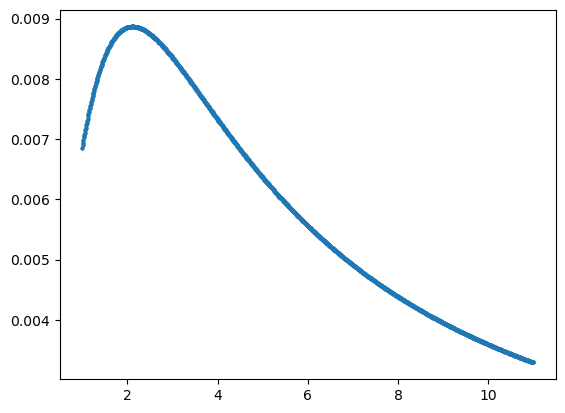

In [29]:
n=np.arange(1,11,0.01)
plt.scatter(n,ftf(Li(n),n), s=5)

In [27]:
n[np.argmax(ftf(Li(n),n))]

2.110000000000001

In [50]:
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])